# Project: Heart Disease II - Coding

## 1. Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

## 2. Import dataset

In [2]:
#Import CSV
data_raw = pd.read_csv('HeartDisease.csv', sep = ',')
data_raw.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
data_raw.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
296,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
#Shape
data_raw.shape

(297, 14)

## 3. Data introduction

### 3.1 Data cleaning

In [5]:
#Identify missing values
data_raw.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64

**No missing values** found.

### 3.2 Descriptive statistics

In [6]:
data_raw.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


**Range** of features is **very different**. Maximum value for *age* is 77 and for *chol* 564.

In [7]:
#Data without Label
data_features = data_raw.drop(['class'], axis=1)
data_features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


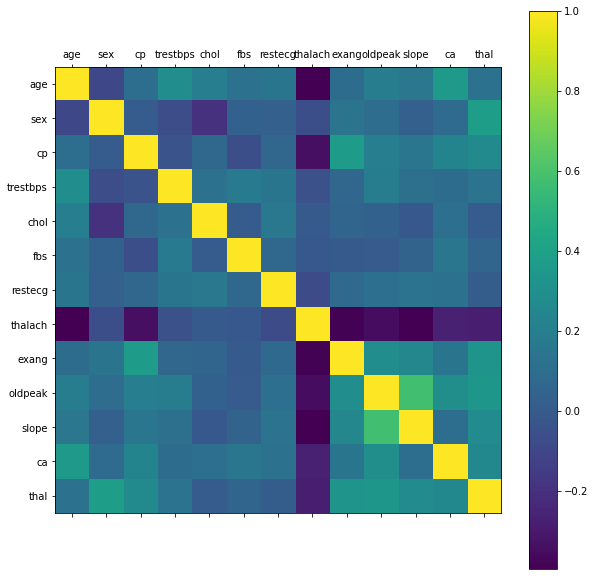

In [8]:
#Correlation matrix
rcParams['figure.figsize'] = 16, 10
plt.matshow(data_features.corr())
plt.yticks(np.arange(data_features.shape[1]), data_features.columns)
plt.xticks(np.arange(data_features.shape[1]), data_features.columns)
plt.colorbar()

There is **no** feature with **high correlation**.

In [9]:
#Data type
print(data_raw.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object


No transformation needed.

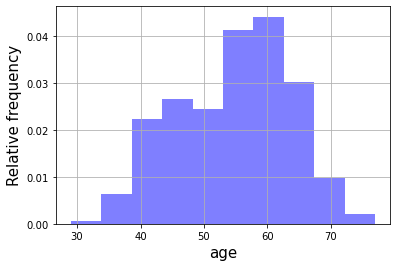

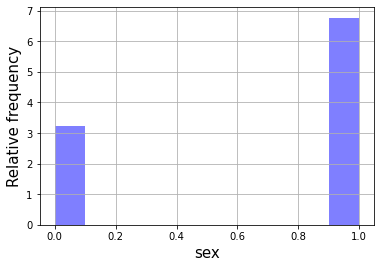

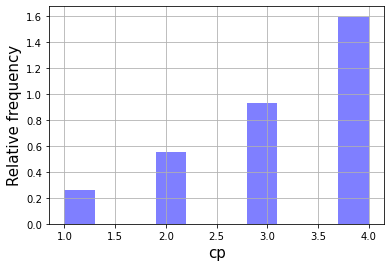

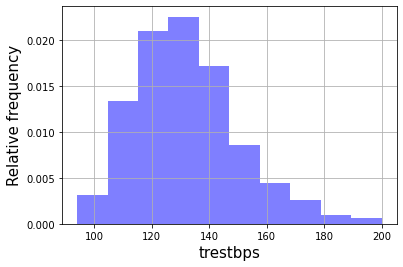

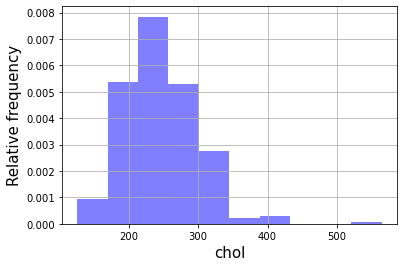

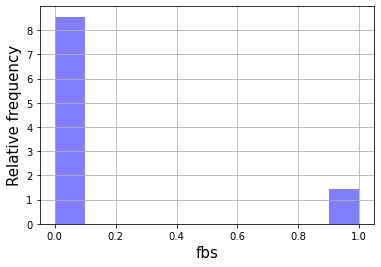

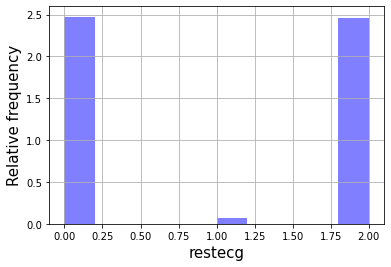

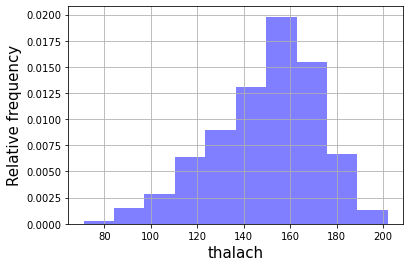

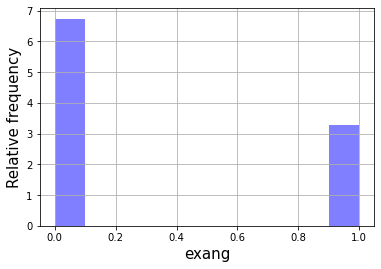

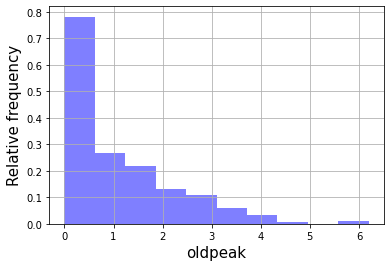

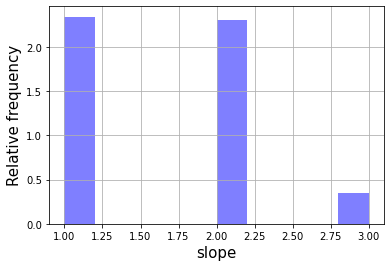

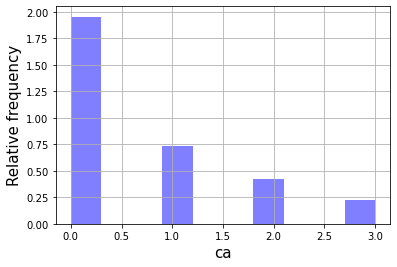

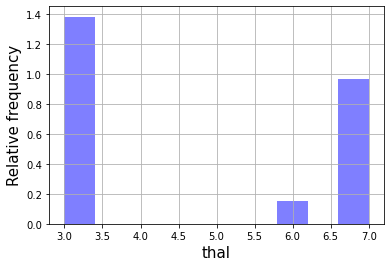

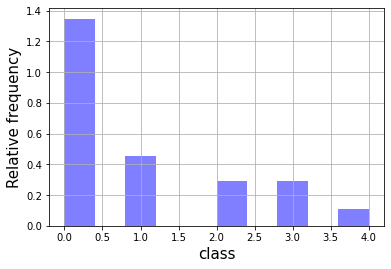

In [10]:
#Plot histogramms
for i in range (0, len(data_raw.columns)):
    data_raw[data_raw.columns[i]].plot(kind = 'hist',
                                         bins = 10,
                                         density = True,
                                         color = 'b',
                                         grid = True,
                                         figsize = (6, 4),
                                         alpha = 0.5)
    plt.xlabel(data_raw.columns[i], fontsize = 15)
    plt.ylabel('Relative frequency', fontsize = 15)
    plt.show()

sex, cp, fbs, restecg, exang, slope, ca, thal and class are **categorial**.

### 3.3 Imbalance of Labels

In [11]:
data_raw['class'].value_counts(normalize = True, sort = False)

0    0.538721
1    0.181818
2    0.117845
3    0.117845
4    0.043771
Name: class, dtype: float64

Labels are **imbalaced**, as most of the people (54%) are healthy.

## 4.0 Data preparation

### 4.1 Binary and multi-class Label

In [12]:
#Convert Label into binary class, 0 = healthy, 1 = ill
data_binary = data_raw
data_binary['class_binary'] = np.where(data_binary['class']!= 0, 1, 0)
data_binary.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class,class_binary
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


In [13]:
#Remove Multi-class label
data_binary = data_binary.drop(axis = 1, columns = 'class')
data_raw = data_raw.drop(axis = 1, columns = 'class_binary')
data_binary.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class_binary
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [14]:
data_raw.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [15]:
data_binary['class_binary'].value_counts(normalize = True, sort = False)

0    0.538721
1    0.461279
Name: class_binary, dtype: float64

For the binary label, the classes are **not imbalanced** anymore (54% and 46%).

### 4.2 Features and Labels

In [16]:
#Create binary Features and labels
feature_names = data_binary.columns[:(len(data_raw.columns)-1)]
X_binary = data_binary[feature_names].values
y_binary = data_binary['class_binary'].values

In [17]:
#Create multi-class Features and labels
X_multi = data_raw[feature_names].values
y_multi = data_raw['class'].values

### 4.3 Data split

In [18]:
#Splitting Data for binary data
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size = 0.2, random_state = 31, stratify = y_binary)

In [19]:
#Splitting Data for multi-class data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size = 0.2, random_state = 32, stratify = y_multi)

### 4.4 Dummy variables

For **decision trees** and **random forest**, one-hot encoding (dummy variables) is **not necessairy**.

https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769
https://kiwidamien.github.io/are-you-getting-burned-by-one-hot-encoding.html

### 4.5 Pre-Processing

For **decision trees** and **random forest**, pre-processing (e.g. normalization) is **not necessairy**. See lecture *K-Means*.

## 5.0 Decision Trees

### 5.1 Models with binary Label

#### 5.1.1 Base-Model

Training a Decision Tree Classifier with default parameters and max_depth = 3

In [20]:
#Define classifier
dtc= DecisionTreeClassifier(random_state = 31, max_depth = 3)

In [21]:
#Train data on test set
dtc.fit(X_train_binary, y_train_binary)

DecisionTreeClassifier(max_depth=3, random_state=31)

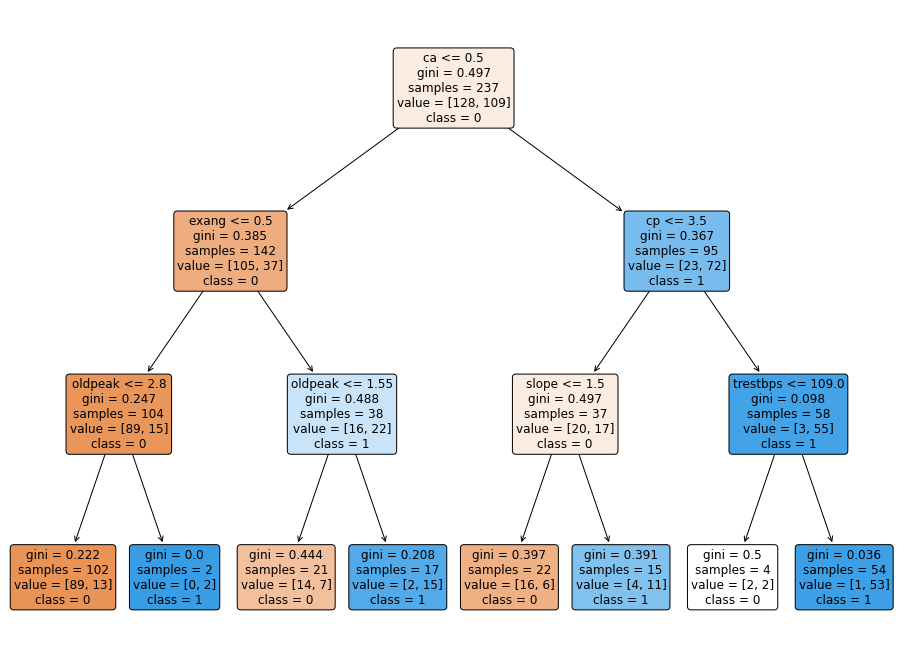

In [22]:
#Plot tree
classnames = ['0', '1']
plt.figure(figsize = (16, 12))
plot_tree(dtc, filled = True, rounded = True, feature_names = feature_names, fontsize = 12, class_names = classnames)
plt.show()

In [23]:
#In sample score
dtc.score(X_train_binary, y_train_binary)

0.8523206751054853

Also measuring Performance of the Model, based on: <br>
- Classification Report (Precision, Recall and F1-Score)

This will allow for easier comparison with the following models

<br>
Presicion = $\frac{True Positive}{True Positive + False Positive}$
<br>
<br>
Recall = $\frac{True Positive}{True Positive + False Negative}$
<br>
<br>
f1-score = $2*\frac{Precision * Recall}{Precision + Recall}$
<br>

In [24]:
#Create classification report
dtc_ypred = dtc.predict(X_test_binary)
print("=== Classification Report ===")
print(classification_report(y_test_binary, dtc_ypred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.77      0.84      0.81        32
           1       0.80      0.71      0.75        28

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



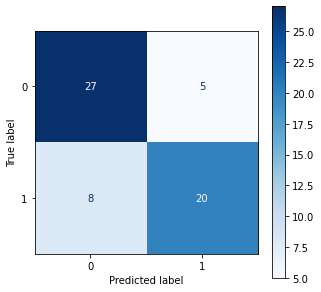

In [25]:
#Confusion matrix for test set
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(dtc, X_test_binary, y_test_binary, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

#### 5.1.2 Model with tuned parameters

Using RandomizedSearchCV from sklearn for hyperparameter tuning on the dtc model. 
- create lists that will be used in the parameter grid
- create randrom_grid (will be passed as parameter in RandomizedSearchCV)
- run random search with 150 iterations and 5-fold cross validation <br>
<br>

In [26]:
#criterion 
criterion = ['entropy', 'gini']
#number of features to consider when looking for the best split
max_features = ["log2", "sqrt"]
#max depth
max_depth = [int(x) for x in np.linspace(1, 20, num = 20)]
max_depth.append(None)

#create random grid
random_grid = {
 "criterion": criterion,
 "max_features": max_features,
 "max_depth": max_depth
 }
#Random search of parameters
dtc_random = RandomizedSearchCV(estimator = dtc, param_distributions = random_grid, n_iter = 150, cv = 5, verbose=2, random_state=31, n_jobs = -1)
#Fit the model
dtc_random.fit(X_train_binary, y_train_binary)
#Print results
print(dtc_random.best_params_)

C:\Users\srhyn\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 84 is smaller than n_iter=150. Running 84 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s


{'max_features': 'log2', 'max_depth': 6, 'criterion': 'entropy'}


[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    1.5s finished


In [27]:
#passing the best parameters into a new model 
dtc_tuned = DecisionTreeClassifier(**dtc_random.best_params_)

In [28]:
dtc_tuned.fit(X_train_binary, y_train_binary)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='log2')

In [29]:
#Create classification report
dtc_tuned_ypred = dtc_tuned.predict(X_test_binary)
print("=== Classification Report ===")
print(classification_report(y_test_binary, dtc_tuned_ypred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        32
           1       0.82      0.64      0.72        28

    accuracy                           0.77        60
   macro avg       0.78      0.76      0.76        60
weighted avg       0.77      0.77      0.76        60



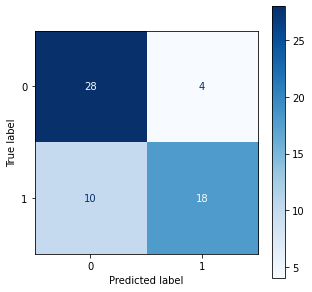

In [30]:
#Confusion matrix for test set
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(dtc_tuned, X_test_binary, y_test_binary, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

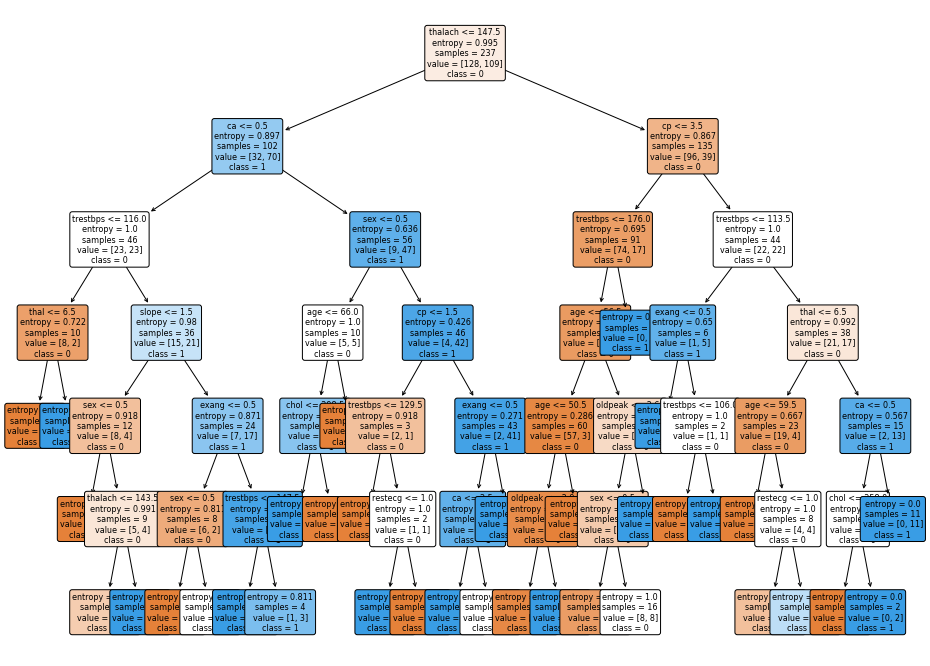

In [31]:
plt.figure(figsize = (16, 12))
plot_tree(dtc_tuned, filled = True, rounded = True, feature_names = feature_names, fontsize = 8, class_names = classnames)
plt.show()

### 5.2 Models with multi-class Label

#### 5.2.1 Base-Model

For the multi-class problem with imbalanced classes, we use the parameter class_weight = balanced. Without this, the Model would be heavily biased towards the majority class (0) and might not have enought data to learn the patterns present in the minority classes (1,2,3,4).

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

In [32]:
#Define classifier
dtc_multi = DecisionTreeClassifier(random_state = 31, class_weight = 'balanced', max_depth = 3)
#Train data on test set
dtc_multi.fit(X_train_multi, y_train_multi)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=31)

In [33]:
#In sample score
dtc_multi.score(X_train_multi, y_train_multi)

0.5063291139240507

In [34]:
#Out of sample score
dtc_multi.score(X_test_multi, y_test_multi)

0.2833333333333333

In [35]:
#Create classification report
dtc_multi_ypred = dtc_multi.predict(X_test_multi)
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test_multi, dtc_multi_ypred))



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.78      0.44      0.56        32
           1       0.08      0.09      0.09        11
           2       0.08      0.14      0.10         7
           3       0.10      0.14      0.12         7
           4       0.00      0.00      0.00         3

    accuracy                           0.28        60
   macro avg       0.21      0.16      0.17        60
weighted avg       0.45      0.28      0.34        60



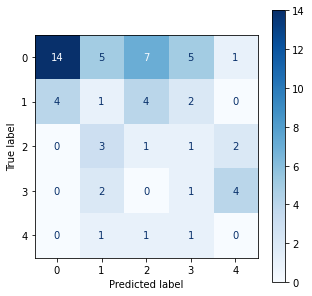

In [36]:
#Confusion matrix for test set
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(dtc_multi, X_test_multi, y_test_multi, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

#### 5.2.2 Model with tuned parameters

Using RandomizedSearchCV from sklearn for hyperparameter tuning on the dtc multi model. 
- create lists that will be used in the parameter grid
- create randrom_grid (will be passed as parameter in RandomizedSearchCV)
- run random search with 150 iterations and 5-fold cross validation <br>
<br>

In [37]:
#criterion 
criterion = ['entropy', 'gini']
#max_features
max_features = ["log2", "sqrt"]
#max depth
max_depth = [int(x) for x in np.linspace(1, 20, num = 20)]
max_depth.append(None)
#class_weight
class_weight = ['balanced']

#create random grid
random_grid = {
 "criterion": criterion,
 "max_features": max_features,
 "class_weight" : class_weight,
 "max_depth": max_depth
 }
#Random search of parameters
dtc_multi_random = RandomizedSearchCV(estimator = dtc_multi, param_distributions = random_grid, n_iter = 150, cv = 5, verbose=2, random_state=31, n_jobs = -1)
#Fit the model
dtc_multi_random.fit(X_train_multi, y_train_multi)
#Print results
print(dtc_multi_random.best_params_)

C:\Users\srhyn\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 84 is smaller than n_iter=150. Running 84 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 84 candidates, totalling 420 fits
{'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced'}


[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    0.7s finished


In [38]:
#Base-Model with best parameters
dtc_multi_tuned = DecisionTreeClassifier(**dtc_multi_random.best_params_)

In [39]:
dtc_multi_tuned.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2')>

In [40]:
dtc_multi_tuned.fit(X_train_multi, y_train_multi)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2')

In [41]:
#Create classification report
dtc_multi_tuned_ypred = dtc_multi_tuned.predict(X_test_multi)
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test_multi, dtc_multi_tuned_ypred))



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.71      0.62      0.67        32
           1       0.08      0.09      0.09        11
           2       0.38      0.43      0.40         7
           3       0.36      0.57      0.44         7
           4       0.00      0.00      0.00         3

    accuracy                           0.47        60
   macro avg       0.31      0.34      0.32        60
weighted avg       0.48      0.47      0.47        60



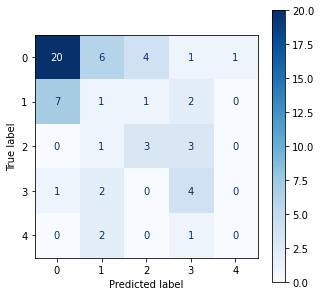

In [42]:
#Confusion matrix for test set
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(dtc_multi_tuned, X_test_multi, y_test_multi, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

# 6.0 Random forest

### 6.1 Models with binary Label

#### 6.1.1 Base-Model

Training a Randrom Forest Classifier Model using default parameters

In [43]:
#RFC model with default parameters, trained on training data
rfc = RandomForestClassifier(random_state = 31)
rfc.fit(X_train_binary,y_train_binary)
#predicting target values on test data with the fitted rfc model
rfc_predict = rfc.predict(X_test_binary)

Measuring Performance of the Model, based on: <br>
- Classification Report (Precision, Recall and F1-Score)


In [44]:
#Classification Report 
print("=== Classification Report ===")
print(classification_report(y_test_binary, rfc_predict))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.89      0.86      0.87        28

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



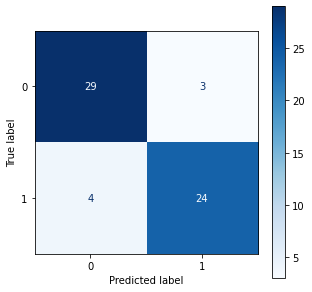

In [45]:
#Confusion matrix for rfc test set
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rfc, X_test_binary, y_test_binary, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

#### 6.1.2 Model with tuned parameters

Using RandomizedSearchCV from sklearn for hyperparameter tuning on the rfc model. 
- create lists that will be used in the parameter grid
- create randrom_grid (will be passed as parameter in RandomizedSearchCV)
- run random search with 150 iterations and 5-fold cross validation <br>
<br>

$\color{red}{\text{running the below code will take up to ~15min}}$

In [46]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 3000, num = 500)]
# number of features at every split
max_features = ["log2", "sqrt"]
#criterion 
criterion = ['entropy', 'gini']
# max depth of individual trees, then appending 'None' as a possible parameter for max_depth
max_depth = [int(x) for x in np.linspace(1, 100, num = 100)]
max_depth.append(None)


# create random grid
random_grid = {
 "criterion": criterion,
 "n_estimators": n_estimators,
 "max_features": max_features,
 "max_depth": max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 150, cv = 5, verbose=2, random_state = 31, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train_binary, y_train_binary)
# print results
print(rfc_random.best_params_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 10.0min finished


{'n_estimators': 139, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'entropy'}


<br>
<br>
We fit another Random Forest Classifier Model using the given 'best parameters' and then run the same performance measurements as before

In [47]:
rfc_tuned = RandomForestClassifier(**rfc_random.best_params_, random_state = 31)
rfc_tuned.fit(X_train_binary,y_train_binary)

#predicting target values on test data with the tuned rfc model
rfc_tuned_predict = rfc_tuned.predict(X_test_binary)

In [48]:
print("=== Classification Report ===")
print(classification_report(y_test_binary, rfc_tuned_predict))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.89      0.86      0.87        28

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



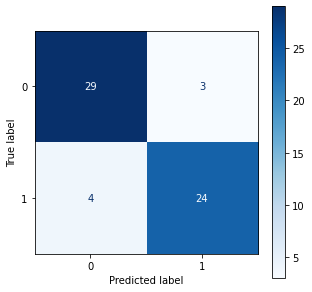

In [49]:
#Confusion matrix for rfc_tuned test set
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rfc_tuned, X_test_binary, y_test_binary, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

### 6.2 Models with multi-class Label

#### 6.2.1 Base-Model

Training a Random Forest Classifier Model using default parameters for the multiclass dataset

In [50]:
#RFC model on multiclass with default parameters, trained on training data
rfc_multi = RandomForestClassifier(class_weight = 'balanced')
rfc_multi.fit(X_train_multi,y_train_multi)
#predicting target values on test data with the fitted rfc model
rfc_multi_predict = rfc_multi.predict(X_test_multi)

Measuring Performance of the Model, based on:

- Classification Report (Precision, Recall and F1-Score)

In [51]:
#Classification Report 
print("=== Classification Report ===")
print(classification_report(y_test_multi, rfc_multi_predict))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        32
           1       0.22      0.18      0.20        11
           2       0.67      0.57      0.62         7
           3       0.33      0.14      0.20         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.39      0.37      0.37        60
weighted avg       0.55      0.62      0.57        60



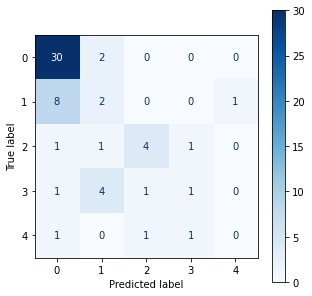

In [52]:
#Confusion matrix for rfc multi test set
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rfc_multi, X_test_multi, y_test_multi, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

#### 6.2.2 Model with tuned parameters

Using RandomizedSearchCV from sklearn for hyperparameter tuning on the rfc model.

- create lists that will be used in the parameter grid
- create randrom_grid (will be passed as parameter in RandomizedSearchCV)
- run random search with 150 iterations and 5-fold cross validation
<br>

$\color{red}{\text{running the below code will take up to ~15min}}$

In [53]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 3000, num = 500)]
# number of features at every split
max_features = ["log2", "sqrt"]
#criterion 
criterion = ['entropy', 'gini']
# max depth of individual trees, then appending 'None' as a possible parameter for max_depth
max_depth = [int(x) for x in np.linspace(1, 100, num = 100)]
max_depth.append(None)
#class weight
class_weight = ['balanced']


# create random grid
random_grid = {
 "criterion": criterion,
 "n_estimators": n_estimators,
 "class_weight": class_weight,
 "max_features": max_features,
 "max_depth": max_depth
 }
# Random search of parameters
rfc_multi_random = RandomizedSearchCV(estimator = rfc_multi, param_distributions = random_grid, n_iter = 150, cv = 5, verbose=2, random_state=31, n_jobs = -1)
# Fit the model
rfc_multi_random.fit(X_train_multi, y_train_multi)
# print results
print(rfc_multi_random.best_params_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 10.4min finished


{'n_estimators': 1575, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'gini', 'class_weight': 'balanced'}


We fit another Random Forest Classifier Model on the multi label data using the given 'best parameters' and then run the same performance measurements as before

In [54]:
rfc_multi_tuned = RandomForestClassifier(**rfc_multi_random.best_params_, random_state = 31)
rfc_multi_tuned.fit(X_train_multi,y_train_multi)

#predicting target values on test data with the tuned rfc model
rfc_multi_tuned_predict = rfc_multi_tuned.predict(X_test_multi)

In [55]:
rfc_multi_tuned.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(class_weight='balanced', max_depth=7,
                       max_features='log2', n_estimators=1575, random_state=31)>

In [56]:
print("=== Classification Report ===")
print(classification_report(y_test_multi, rfc_multi_tuned_predict))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        32
           1       0.18      0.18      0.18        11
           2       0.50      0.43      0.46         7
           3       0.20      0.14      0.17         7
           4       0.00      0.00      0.00         3

    accuracy                           0.58        60
   macro avg       0.33      0.33      0.33        60
weighted avg       0.52      0.58      0.55        60



C:\Users\srhyn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


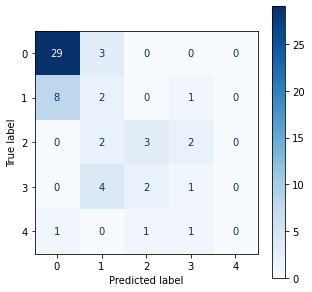

In [57]:
#Confusion matrix for rfc multi tuned on test set
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rfc_multi_tuned, X_test_multi, y_test_multi, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()